<a href="https://colab.research.google.com/github/isralennon/MSAAI530/blob/main/USD%2C_IoT%2C_Final_Project%2C_Forecast_future_accelerometer_values%2C_o3%2C_greater_forecast_window_and_optimized_for_L4%2C_i2_with_mixed_float16_(should_be_same_as_i2%2C_but_happens_to_do_better).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Version/Iteration I2.1

* I reran I2 with Mixed precision added at the beggining, and got significantly better revluation results...
* I presume this must be due to differences in the splitup...
* I should probably use a seed in the future...
* Turns out I actually don't think I needed to add the mixed precision to the beggining, as it's already by the 'callbacks' section...
* But maybe I'm missing something here...

Mixed precision enabled.
Found 18 CSV files.
Train subjects: 12, Val subjects: 2, Test subjects: 4
Train data shape (before windowing): X=(1552091, 6), y=(1552091,)
Val data shape   (before windowing): X=(221631, 6),   y=(221631,)
Test data shape  (before windowing): X=(485839, 6),  y=(485839,)
Training data shape: X = (1552022, 50, 6) , y = (1552022, 20, 1)
Validation data shape: X = (221562, 50, 6) , y = (221562, 20, 1)
Test data shape: X = (485770, 50, 6) , y = (485770, 20, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 20, 1)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,068 (133.08 KB)

 Trainable params: 34,068 (133.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 279s 11ms/step - loss: 0.0090 - val_loss: 4.1771e-04
Epoch 2/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 271s 11ms/step - loss: 3.6781e-04 - val_loss: 3.6373e-04
Epoch 3/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 271s 11ms/step - loss: 3.4999e-04 - val_loss: 3.5966e-04
Epoch 4/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 272s 11ms/step - loss: 3.4074e-04 - val_loss: 3.8208e-04
Epoch 5/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 272s 11ms/step - loss: 3.3464e-04 - val_loss: 3.7112e-04
Epoch 6/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 272s 11ms/step - loss: 3.3092e-04 - val_loss: 3.4695e-04
Epoch 7/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 272s 11ms/step - loss: 3.2717e-04 - val_loss: 3.4132e-04
Epoch 8/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 272s 11ms/step - loss: 3.2407e-04 - val_loss: 3.6556e-04
Epoch 9/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 272s 11ms/step - loss: 3.2208e-04 - val_loss: 3.8134e-04
Epoch 10/20
24251/24251 ━━━━━━━━━━━━━━━━━━━━ 272s 11ms/step - loss: 3.2009e-04 - val_loss: 3.83

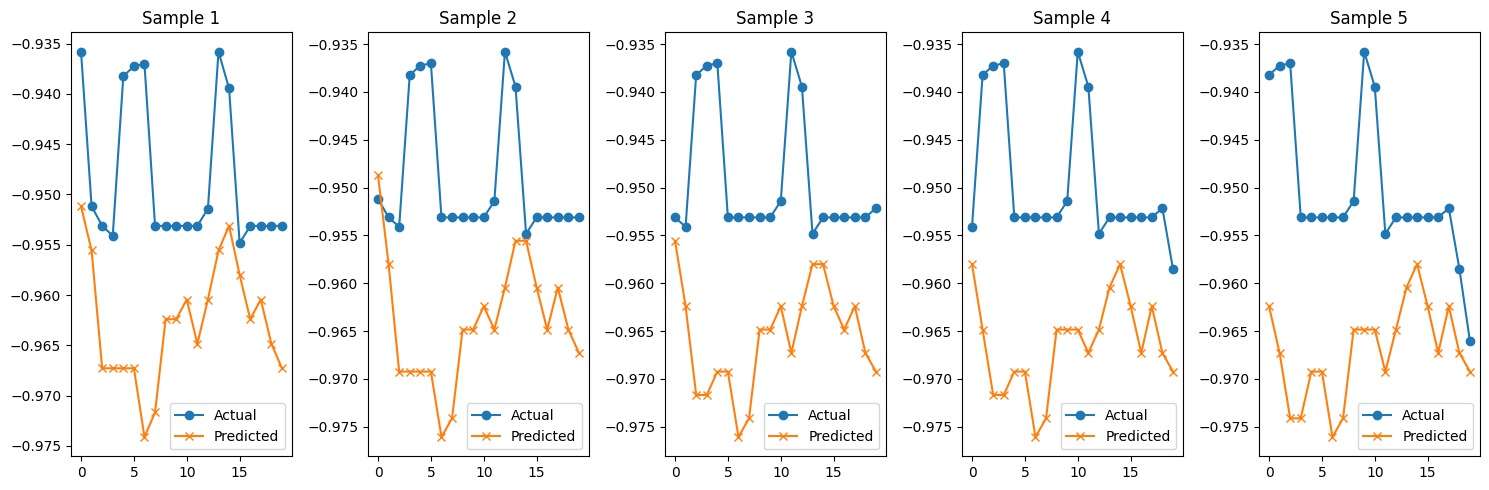

15181/15181 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step
Mean Absolute Error (MAE): 0.0655
Mean Squared Error (MSE): 0.0098
Root Mean Squared Error (RMSE): 0.0988


In [ ]:
# Get Data
!wget -q https://archive.ics.uci.edu/static/public/780/har70.zip
!unzip -q har70.zip

import os
import glob
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Mixed precision for faster GPU training
if tf.config.list_physical_devices('GPU'):
    from tensorflow.keras import mixed_precision
    mixed_precision.set_global_policy('mixed_float16')
    print("Mixed precision enabled.")

# Parameters
DATA_DIR = "har70plus"
SENSOR_COLUMNS = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
TARGET_COLUMN = 'back_x'   # Focusing on 'back_x' for this iteration
train_ratio, val_ratio = 0.70, 0.15
input_window = 50    # Use the past 50 time steps as input
forecast_window = 20 # Forecast the next 20 time steps

# Subject-level splitting
csv_files = glob.glob(os.path.join(DATA_DIR, "*.csv"))
print(f"Found {len(csv_files)} CSV files.")

random.shuffle(csv_files)
n_files = len(csv_files)
train_count = int(n_files * train_ratio)
val_count = int(n_files * val_ratio)

train_files = csv_files[:train_count]
val_files   = csv_files[train_count: train_count + val_count]
test_files  = csv_files[train_count + val_count:]

print(f"Train subjects: {len(train_files)}, Val subjects: {len(val_files)}, Test subjects: {len(test_files)}")

# Loading & Feature Engineering
def load_subject_data(file):
    """
    Loads and processes a single subject's CSV.
    Returns (X_data, y_data) where:
      - X_data: Multi-sensor input features (after rolling mean).
      - y_data: The target column (raw, no rolling).
    """
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.sort_values('timestamp', inplace=True)

    # Apply a rolling mean of window size 3 to each sensor column
    for col in SENSOR_COLUMNS:
        df[col + '_mean3'] = df[col].rolling(window=3).mean()

    # Drop rows that become NaN due to rolling
    df.dropna(inplace=True)

    # X_data = 6 columns (each smoothed) => shape: (n_samples, 6)
    X_data = df[[col + '_mean3' for col in SENSOR_COLUMNS]].values

    # y_data = 1 column (raw target)
    y_data = df[TARGET_COLUMN].values

    return X_data, y_data

def load_subjects(file_list):
    """
    Loads multiple CSV files (subjects) and concatenates them into one big array.
    """
    X_list, y_list = [], []
    for file in file_list:
        try:
            X_data, y_data = load_subject_data(file)
        except Exception as e:
            print(f"Error reading {file}: {e}")
            continue
        if len(X_data) < (input_window + forecast_window):
            continue
        X_list.append(X_data)
        y_list.append(y_data)
    # Concatenate all subjects into one big array
    if len(X_list) == 0:
        return None, None
    X_all = np.concatenate(X_list, axis=0)
    y_all = np.concatenate(y_list, axis=0)
    return X_all, y_all

X_train_all, y_train_all = load_subjects(train_files)
X_val_all,   y_val_all   = load_subjects(val_files)
X_test_all,  y_test_all  = load_subjects(test_files)

print(f"Train data shape (before windowing): X={X_train_all.shape}, y={y_train_all.shape}")
print(f"Val data shape   (before windowing): X={X_val_all.shape},   y={y_val_all.shape}")
print(f"Test data shape  (before windowing): X={X_test_all.shape},  y={y_test_all.shape}")



# SCALE

# Separate scalers for X (multi-sensor) & y (single channel)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit on training data only
scaler_x.fit(X_train_all)
y_train_all_reshaped = y_train_all.reshape(-1, 1)
scaler_y.fit(y_train_all_reshaped)

# Transform
X_train_all_scaled = scaler_x.transform(X_train_all)
X_val_all_scaled   = scaler_x.transform(X_val_all)
X_test_all_scaled  = scaler_x.transform(X_test_all)

y_train_all_scaled = scaler_y.transform(y_train_all_reshaped).flatten()
y_val_all_scaled   = scaler_y.transform(y_val_all.reshape(-1, 1)).flatten()
y_test_all_scaled  = scaler_y.transform(y_test_all.reshape(-1, 1)).flatten()



# Sliding Window
def create_windows(X_array, y_array, input_window, forecast_window):
    """
    Creates sliding windows for multi-sensor X and single-sensor y.
    Returns X_windows of shape (num_samples, input_window, num_features)
    and y_windows of shape (num_samples, forecast_window).
    """
    X_windows, y_windows = [], []
    n = len(X_array)
    for i in range(n - input_window - forecast_window + 1):
        X_seq = X_array[i : i + input_window]
        y_seq = y_array[i + input_window : i + input_window + forecast_window]
        X_windows.append(X_seq)
        y_windows.append(y_seq)
    return np.array(X_windows), np.array(y_windows)

X_train, y_train = create_windows(X_train_all_scaled, y_train_all_scaled, input_window, forecast_window)
X_val,   y_val   = create_windows(X_val_all_scaled,   y_val_all_scaled,   input_window, forecast_window)
X_test,  y_test  = create_windows(X_test_all_scaled,  y_test_all_scaled,  input_window, forecast_window)

# Reshape y to (num_samples, forecast_window, 1) for easy LSTM output
y_train = y_train.reshape(-1, forecast_window, 1)
y_val   = y_val.reshape(-1, forecast_window, 1)
y_test  = y_test.reshape(-1, forecast_window, 1)

print("Training data shape: X =", X_train.shape, ", y =", y_train.shape)
print("Validation data shape: X =", X_val.shape, ", y =", y_val.shape)
print("Test data shape: X =", X_test.shape, ", y =", y_test.shape)



# Create tf.data datasets for optimized GPU training
BATCH_SIZE = 64

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(20000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)



# Deeper Forcasting Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape, Dropout

# Number of features = len(SENSOR_COLUMNS) bec. we used rolling means
num_features = X_train.shape[-1]

model = Sequential([
    Input(shape=(input_window, num_features)),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(16, activation='tanh'),
    Dropout(0.2),
    Dense(forecast_window),
    Reshape((forecast_window, 1))
])

model.compile(optimizer='adam', loss='mse')
model.summary()




# Training with Call backs
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
]

EPOCHS = 20
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=val_ds,
                    callbacks=callbacks)



# Evaluate
test_loss = model.evaluate(test_ds)
print("Final Test Loss (MSE):", test_loss)



# Additional Metrics & Visualizations
def plot_predictions(model, X_test, y_test, scaler_y, num_samples=5):
    """
    Plot predictions vs actuals for a few samples from the test set.
    We assume y_test has shape (samples, forecast_window, 1).
    """
    preds = model.predict(X_test)
    # shape: (samples, forecast_window, 1)
    preds = preds.reshape(-1, forecast_window)
    y_test = y_test.reshape(-1, forecast_window)

    # Inverse transform the predictions & actual values (for interpretability)
    preds_inv = scaler_y.inverse_transform(preds)
    y_test_inv = scaler_y.inverse_transform(y_test)

    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.plot(y_test_inv[i], label="Actual", marker='o')
        plt.plot(preds_inv[i], label="Predicted", marker='x')
        plt.title(f"Sample {i+1}")
        plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test, scaler_y):
    """
    Evaluate the model on test data with MAE, MSE, and RMSE.
    """
    preds = model.predict(X_test)
    preds = preds.reshape(-1, forecast_window)
    y_test = y_test.reshape(-1, forecast_window)

    # Inverse transform predictions (for interpretability)
    preds_inv = scaler_y.inverse_transform(preds)
    y_test_inv = scaler_y.inverse_transform(y_test)

    mae = mean_absolute_error(y_test_inv, preds_inv)
    mse = mean_squared_error(y_test_inv, preds_inv)
    rmse = math.sqrt(mse)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot some predictions
plot_predictions(model, X_test, y_test, scaler_y, num_samples=5)

# Compute additional metrics
evaluate_model(model, X_test, y_test, scaler_y)
